Dill Thafa Jausha

2311110048

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score
plt.style.use("fivethirtyeight")

#**Pre-Processing dan EDA**

In [2]:
data = pd.read_csv('/content/Dataset-Tugas.csv')
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.drop('class', axis=1, inplace=True)
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
data.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


Tidak terdapat nilai null pada data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
#Melihat jumlah outlier
def count_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bpund = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bpund)).sum()

outlier_counts = {}
for col in data.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = count_outliers_iqr(data[col])

outlier_counts_data = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

outlier_counts_data

,Column,Outlier Count
0,sepal length,0
1,sepal width,4
2,petal length,0
3,petal width,0


Terdapat outlier di variabel sepal width. Namun karena jumlah outlier kecil dan tidak secara signifikan memengaruhi, maka tidak dihapus.

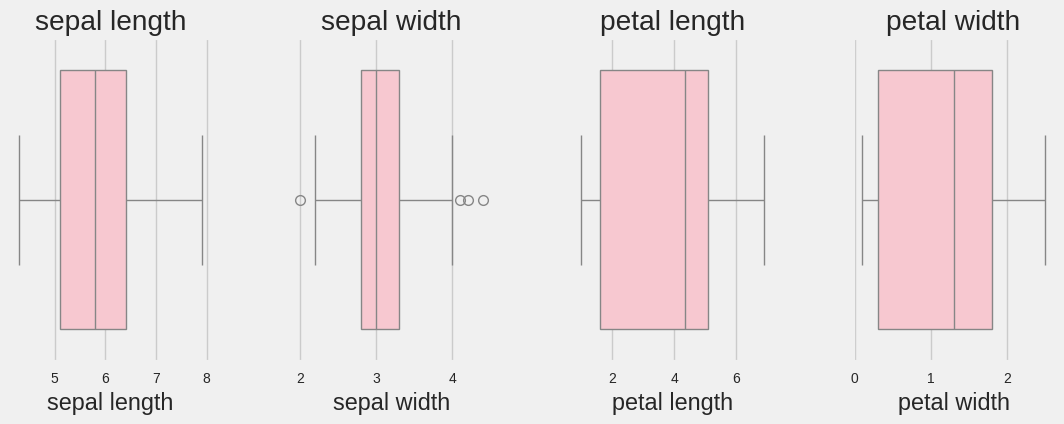

In [7]:
#Melihat outlier dengan boxplot
def box_plot(data):
  variables = ["sepal length", "sepal width", "petal length", "petal width"]
  fig, axes = plt.subplots(1, 4, figsize=(12, 4))
  fig.subplots_adjust(hspace= 0.4, wspace=0.4)

  for i, var in enumerate(variables):
    sns.boxplot(x=data[var], data=data, color="pink", ax=axes[i])
    axes[i].set_title(var)

  plt.show()


box_plot(data)

#**K-Means**

In [9]:
# normalisasi
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(data)
x_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [46]:
#Menjalankan K-Means Clustering ke dataset
model1 = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_pred1 = model1.fit(x_scaled)

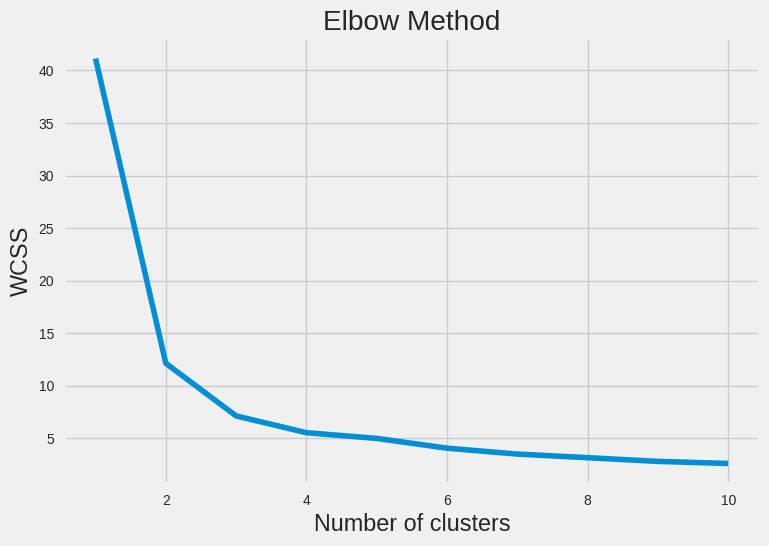

In [47]:
wcss = []
for i in range(1, 11) :
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

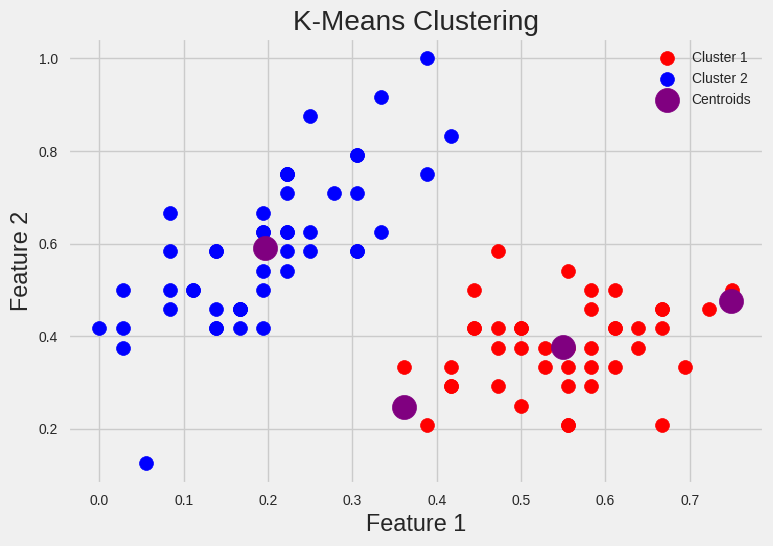

In [48]:
# Visualisasi hasil
plt.scatter(x_scaled[y_pred1.labels_ == 0, 0], x_scaled[y_pred1.labels_ == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_scaled[y_pred1.labels_ == 1, 0], x_scaled[y_pred1.labels_ == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s = 300, c = 'purple', label = 'Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Berdasarkan hasil klastering k-means, gambar menunjukkan tiga klaster bunga Iris berdasarkan panjang dan lebar sepal, yaitu Klaster 1, Klaster 2, dan Pusat Klaster. Klaster 1 (titik merah) lebih rapat, sementara Klaster 2 (titik biru) lebih tersebar. Titik pusat (warna ungu) menunjukkan rata-rata lokasi tiap klaster.


In [49]:
data['Label_K-Means'] = model1.labels_
data.head(50)


,sepal length,sepal width,petal length,petal width,Label_DB-Scan,Label_K-Means
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


#**DBSCAN**

In [43]:
model2 = DBSCAN(eps=0.20, min_samples=5)
model2.fit_predict(x_scaled)
y_pred2 = model2.labels_
y_pred2


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

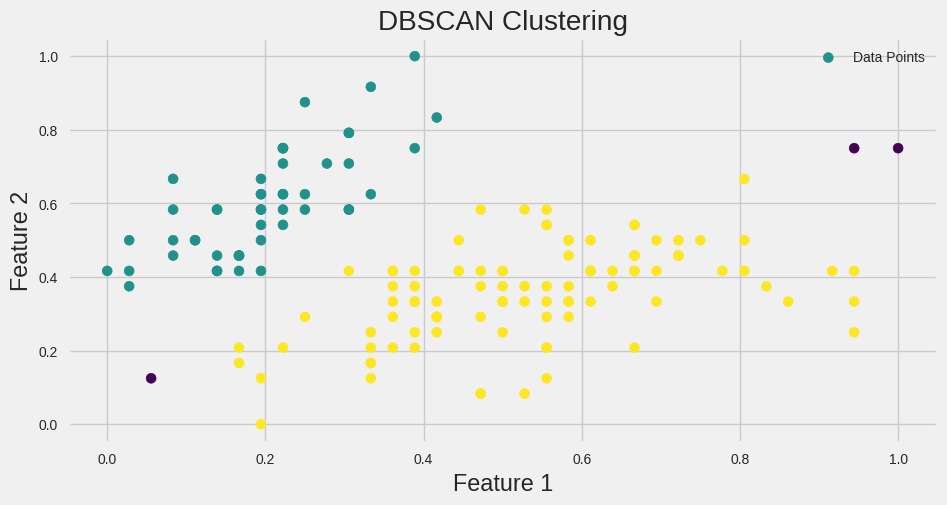

In [45]:
from sklearn.cluster import DBSCAN

# Model DBSCAN
#Membuat objek DBSCAN dengan parameter epsilon dan jumlah minimum sampel
model2 = DBSCAN(eps=0.20, min_samples=5)
y_dbscan = model2.fit_predict(x_scaled)

# Visualisasi hasil DBSCAN
plt.figure(figsize=(10, 5))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_dbscan, cmap='viridis', s=50, label='Data Points')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Gambar ini menunjukkan hasil klastering DBSCAN pada dataset dengan dua fitur, mengidentifikasi 3 klaster dengan kepadatan berbeda: satu klaster besar (kuning) dan dua klaster kecil (hijau dan ungu). Beberapa titik data dianggap sebagai noise.

In [50]:
data['Label_DB-Scan'] = model2.labels_
data.head(50)

,sepal length,sepal width,petal length,petal width,Label_DB-Scan,Label_K-Means
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


#**Evaluasi**

In [51]:
#Menghitung silhouette score algoritma K-Means
Evaluasi_KMeans = silhouette_score(x_scaled, y_pred1.labels_)
print("Silhouette Score K-Means: ", Evaluasi_KMeans)

Silhouette Score K-Means:  0.4435001045329514


Silhoutte score algoritma K-Means menunjukkan angka yang cenderung mendekati 0. Sehingga belum bisa dikatakan pilihan model yang baik.

In [34]:
#M2nghitung silhouette score algoritma DBSCAN
Evaluasi_DBSCAN = silhouette_score(x_scaled, y_pred2)
print("Silhouette Score: ", Evaluasi_DBSCAN)

Silhouette Score:  0.5552633662863133


Silhoutte score algoritma DBSCAN menunjukkan angka yang tidak terlalu besar dan mendekati 1. Namun, jika dibandingkan dengan silhoutte score algoritma K-Means, score DBSCAN lebih baik.

In [35]:
#Menghitung DBI score algoritma K-Means
dbi_score1 = davies_bouldin_score(x_scaled, y_pred1.labels_)
print("Davies-Bouldin Index (DBI): ", dbi_score1)

Davies-Bouldin Index (DBI):  0.9088222678414


In [36]:
#Menghitung DBI score algoritma DBSCAN
dbi_score2 = davies_bouldin_score(x_scaled, y_pred2)
print("Davies-Bouldin Index (DBI): ", dbi_score2)

Davies-Bouldin Index (DBI):  3.1179178661907776


Jika dbi score kedua algoritma dibandingkan, didapati bahwa indeks di algoritma DBSCAN lebih tinggi dari K-Means. Nilai indeks yang lebih tinggi ini menunjukkan solusi pengelompokkan yang lebih buruk, karena klaster tidak teprisah dengan baik. Sehingga, dapat dikatakan bahwa pengelompokkan K-Means lebih baik.

Perbandingan kedua model

Dilihat dari silhoutte score dan DBI, algoritma yang lebih baik dipakai adalah K-Means,